# Comparing glider datasets

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import datetime
import numpy as np
import cartopy
from erddapy import ERDDAP
from argopy import DataFetcher as ArgoDataFetcher
import utils
from pathlib import Path
plt.rcParams.update({'font.size': 14})

/home/callum/mambaforge/envs/erddapdemo/lib/python3.11/site-packages/argopy/plotters.py:41: UserWarning: argopy requires seaborn installed for full plotting functionality
  warnings.warn("argopy requires seaborn installed for full plotting functionality")


# Get calibration ctd casts

Starting in April 2023, we take reference CTD casts when deploying and recovering gliders. These can be used to check for sensor drift

In [2]:
e = ERDDAP(
    server="https://erddap.observations.voiceoftheocean.org/erddap",
    protocol="tabledap",
)

# Fetch dataset list
e.response = "csv"
e.dataset_id = "allDatasets"
df_datasets = e.to_pandas(parse_dates=['minTime (UTC)', 'maxTime (UTC)'])

# drop the allDatasets row and make the datasetID the index for easier reading
df_datasets.set_index("datasetID", inplace=True)
df_datasets.drop("allDatasets", inplace=True)

df_datasets = df_datasets[df_datasets.index.str[:3] == "nrt"]
df_recent = df_datasets.sort_values(by="maxTime (UTC)").tail(10)
print(f"Analysing most recent {len(df_recent)} nrt datasets")

Analysing most recent 10 nrt datasets


Download the glider datasets

In [3]:
nrt_dict = utils.download_glider_dataset(df_recent.index)

  0%|          | 0/10 [00:00<?, ?it/s]

/home/callum/mambaforge/envs/erddapdemo/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


/home/callum/mambaforge/envs/erddapdemo/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


/home/callum/mambaforge/envs/erddapdemo/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


/home/callum/mambaforge/envs/erddapdemo/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


/home/callum/mambaforge/envs/erddapdemo/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


/home/callum/mambaforge/envs/erddapdemo/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


/home/callum/mambaforge/envs/erddapdemo/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


found deployment ctd cast
found recovery ctd cast


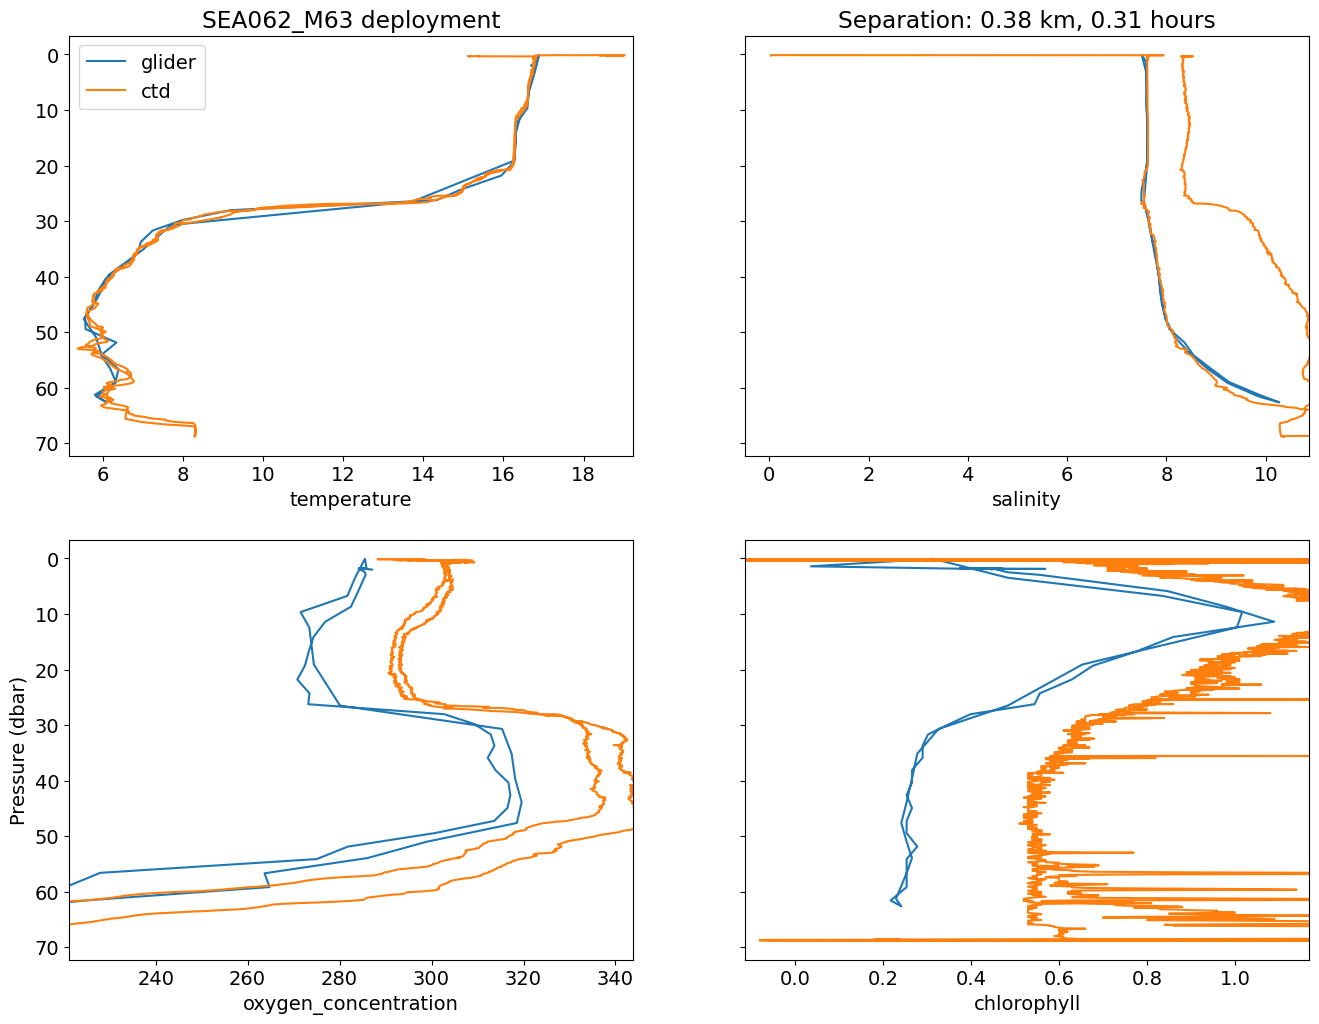

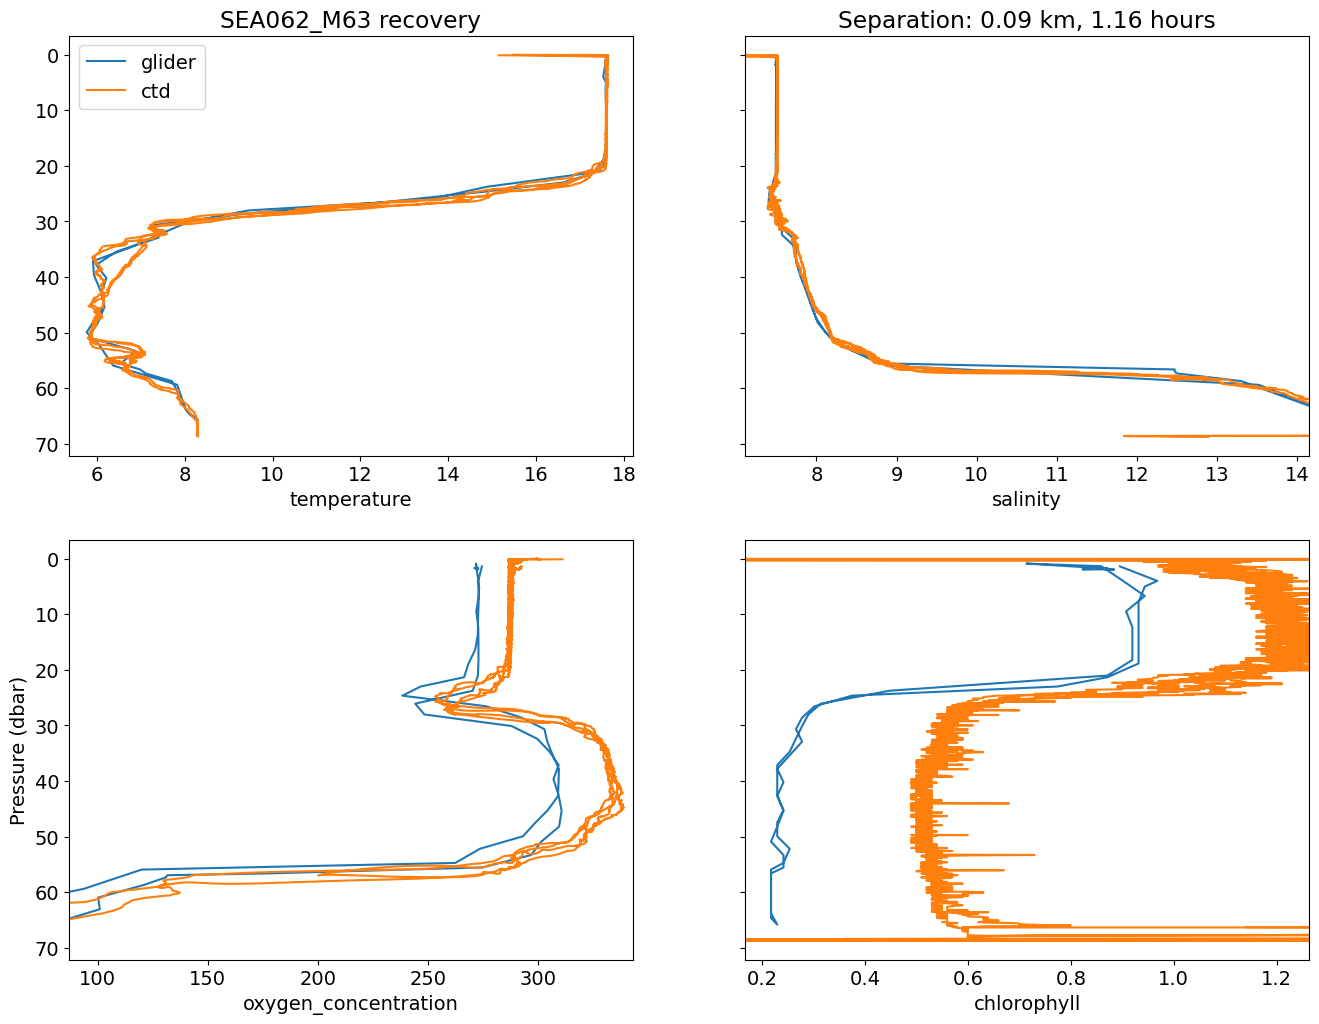

In [4]:
ctds = utils.nearby_ctd(nrt_dict[list(nrt_dict)[1]], comparison_plots=True)

In [5]:
ctds["deployment"]

,time,pressure,temperature,salinity,conductivity,density,chlorophyll,oxygen_concentration,sonde_name,sonde_number,calibration_date,filename,longitude,latitude,cast_number
row,,,,,,,,,,,,,,,
62070,2023-07-08 07:45:15,0.162,18.566,0.035,0.057,998.518,0.13,292.810,ASTD152-ALC-R02,0788,2022-12-15,202307080745_ASTD152-ALC-R02_0788_074510,16.359,55.568,15.0
62071,2023-07-08 07:45:15,0.142,18.573,0.034,0.056,998.516,0.10,292.785,ASTD152-ALC-R02,0788,2022-12-15,202307080745_ASTD152-ALC-R02_0788_074510,16.359,55.568,15.0
62072,2023-07-08 07:45:15,0.142,18.578,0.035,0.057,998.515,0.13,292.715,ASTD152-ALC-R02,0788,2022-12-15,202307080745_ASTD152-ALC-R02_0788_074510,16.359,55.568,15.0
62073,2023-07-08 07:45:15,0.142,18.585,0.035,0.057,998.514,0.09,292.636,ASTD152-ALC-R02,0788,2022-12-15,202307080745_ASTD152-ALC-R02_0788_074510,16.359,55.568,15.0
62074,2023-07-08 07:45:15,0.142,18.595,0.035,0.057,998.512,0.09,292.284,ASTD152-ALC-R02,0788,2022-12-15,202307080745_ASTD152-ALC-R02_0788_074510,16.359,55.568,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66075,2023-07-08 07:51:55,0.305,15.150,8.514,11.851,1005.621,-0.04,292.864,ASTD152-ALC-R02,0788,2022-12-15,202307080745_ASTD152-ALC-R02_0788_074510,16.359,55.568,15.0
66076,2023-07-08 07:51:55,0.305,15.147,8.515,11.852,1005.623,-0.04,293.362,ASTD152-ALC-R02,0788,2022-12-15,202307080745_ASTD152-ALC-R02_0788_074510,16.359,55.568,15.0
66077,2023-07-08 07:51:55,0.305,15.144,8.516,11.852,1005.624,-0.04,293.529,ASTD152-ALC-R02,0788,2022-12-15,202307080745_ASTD152-ALC-R02_0788_074510,16.359,55.568,15.0


# Get nearest argo floats to glidermission

Argo floats are a great utility for checking your data against. In this notebook, we look for argo floats within a set spatio-temporal range of our glider data.

We will use the excellent [argopy](https://github.com/euroargodev/argopy) library, which uses ERDDAP to fetch argo data.


### 1. Download glider datasets from our own ERDDAP


First, we fetch a list of all nrt datasets


In [6]:
datasets_to_download = utils.find_glider_datasets()

Now we download the datasets, specifying only the variables that we will need

In [7]:
# Specify variables of interest
desired_variables = [
    "latitude",
    "longitude",
    "salinity",
    "temperature",
    "time",
    "pressure"
]

glider_datasets = utils.download_glider_dataset(datasets_to_download[::10], nrt_only=True,
                                               variables=desired_variables)

  0%|          | 0/16 [00:00<?, ?it/s]

### 2. Find nearest argo profile for each glidermission

We can set tolerances for how close an argo profile must be in time and space

In [8]:
def nearest_argo_profile(ds_glider, lat_window=0.5, lon_window=1, time_window = np.timedelta64(7, "D")):
    """
    Finds the nearest argo profile to a supplied glidermission. Uses ifremer ERDDAP
    """
    mean_lon = ds_glider.longitude.mean().values
    mean_lat = ds_glider.latitude.mean().values
    mean_time = ds_glider.time.mean().values
    max_pressure = ds_glider.pressure.max()
    min_time = str(mean_time-time_window)[:10]
    max_time = str(mean_time+time_window)[:10]
    if not max_pressure:
        print("bad pressures")
        return None
    search_region = [mean_lon-lon_window, mean_lon+lon_window, 
                 mean_lat-lat_window, mean_lat+lat_window,
                 0, int(max_pressure),
                 min_time, max_time]
    try:
        ds = ArgoDataFetcher(src='erddap').region(search_region).to_xarray()
        ds2 = ds.argo.point2profile()
        closest_time_index = np.abs(ds2.TIME.values-mean_time).argmin()
        profile = ds2.isel({"N_PROF":closest_time_index})
        deg_n = profile.LATITUDE.values - np.nanmean(ds_glider.latitude)
        deg_e = profile.LONGITUDE.values - np.nanmean(ds_glider.longitude)
        ns_ahead = profile.TIME.values - ds_glider.time.mean()
        east_diff, north_diff, time_diff = utils.format_difference(deg_e, deg_n, ns_ahead)
        loc_str = f"Nearest float is {east_diff}, {north_diff} & {time_diff} than mean of glider data"
        print(loc_str)
        return profile
    except:
        print("No floats found within tolerances")
        return None
    

In [9]:
def nearest_argo_profile(ds_glider, lat_window=0.5, lon_window=1, time_window = np.timedelta64(7, "D")):
    """
    Finds the nearest argo profile to a supplied glidermission. Uses ifremer ERDDAP
    """
    mean_lon = ds_glider.longitude.mean().values
    mean_lat = ds_glider.latitude.mean().values
    mean_time = ds_glider.time.mean().values
    max_pressure = ds_glider.pressure.max()
    min_time = str(mean_time-time_window)[:10]
    max_time = str(mean_time+time_window)[:10]
    search_region = [mean_lon-lon_window, mean_lon+lon_window, 
                 mean_lat-lat_window, mean_lat+lat_window,
                 0, int(max_pressure),
                 min_time, max_time]
    try:
        ds = ArgoDataFetcher(src='erddap').region(search_region).to_xarray()
    except FileNotFoundError:
        print("no argo floats in region")
        return None
    ds2 = ds.argo.point2profile()
    closest_time_index = np.abs(ds2.TIME.values-mean_time).argmin()
    profile = ds2.isel({"N_PROF":closest_time_index})
    deg_n = profile.LATITUDE.values - np.nanmean(ds_glider.latitude)
    deg_e = profile.LONGITUDE.values - np.nanmean(ds_glider.longitude)
    ns_ahead = profile.TIME.values - ds_glider.time.mean()
    east_diff, north_diff, time_diff = utils.format_difference(deg_e, deg_n, ns_ahead)
    loc_str = f"Nearest float is {east_diff}, {north_diff} & {time_diff} than mean of glider data"
    print(loc_str)
    return profile


In [11]:
argo_datasets = {}
for name, ds in glider_datasets.items():
    print(f"Trying dataset {name}")
    argo_datasets[name] = utils.nearest_argo_profile(ds, lat_window=1, lon_window=2)
fail, success = 0, 0
for val in argo_datasets.values():
    if val:
        success+=1
    else:
        fail+=1
print(f"\nsuccess: {success}, fail: {fail}")  

Trying dataset nrt_SEA068_M27
Nearest float is 9.8 km E, 109.1 km S & 11.0 hours later than mean of glider data
Trying dataset nrt_SEA055_M16
no argo floats in region
Trying dataset nrt_SEA055_M33
no argo floats in region
Trying dataset nrt_SEA055_M52
no argo floats in region
Trying dataset nrt_SEA045_M43
no argo floats in region
Trying dataset nrt_SEA045_M62
Nearest float is 45.8 km E, 32.2 km N & 7.1 hours earlier than mean of glider data
Trying dataset nrt_SEA063_M17
no argo floats in region
Trying dataset nrt_SEA063_M38
Nearest float is 35.3 km E, 35.0 km N & 10.2 hours earlier than mean of glider data
Trying dataset nrt_SEA044_M28
no argo floats in region
Trying dataset nrt_SEA044_M72
no argo floats in region
Trying dataset nrt_SEA067_M29
no argo floats in region
Trying dataset nrt_SEA066_M12
Nearest float is 4.7 km W, 1.3 km N & 15.8 hours later than mean of glider data
Trying dataset nrt_SEA070_M29
Nearest float is 210.6 km E, 57.0 km S & 22.7 hours later than mean of glider dat

### 3. Create scatter plots to compare the temperature and salinity of the glider and its nearest float

We can sanity check our data by visual inspection. A more reliable test would be some form of statistical comparison of the two datasets.

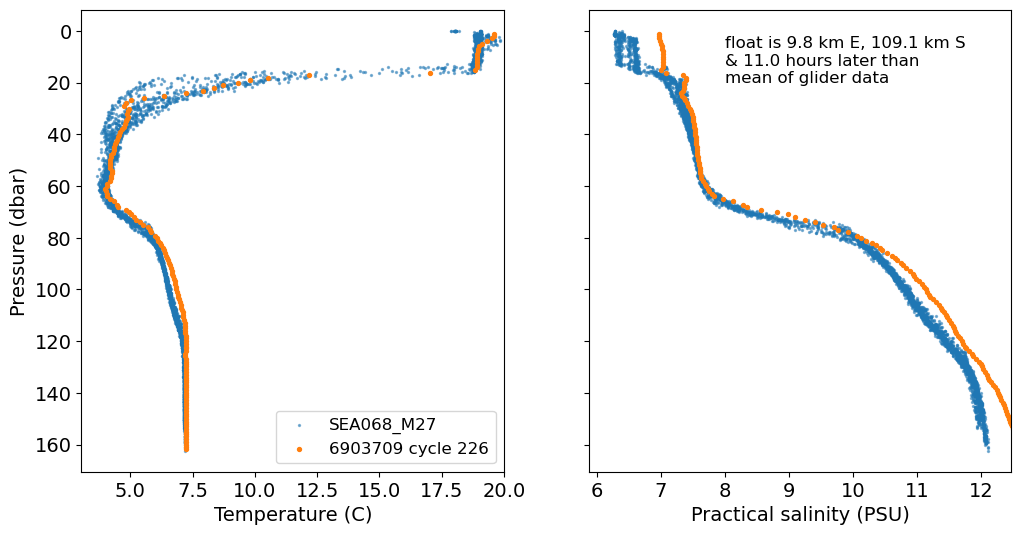

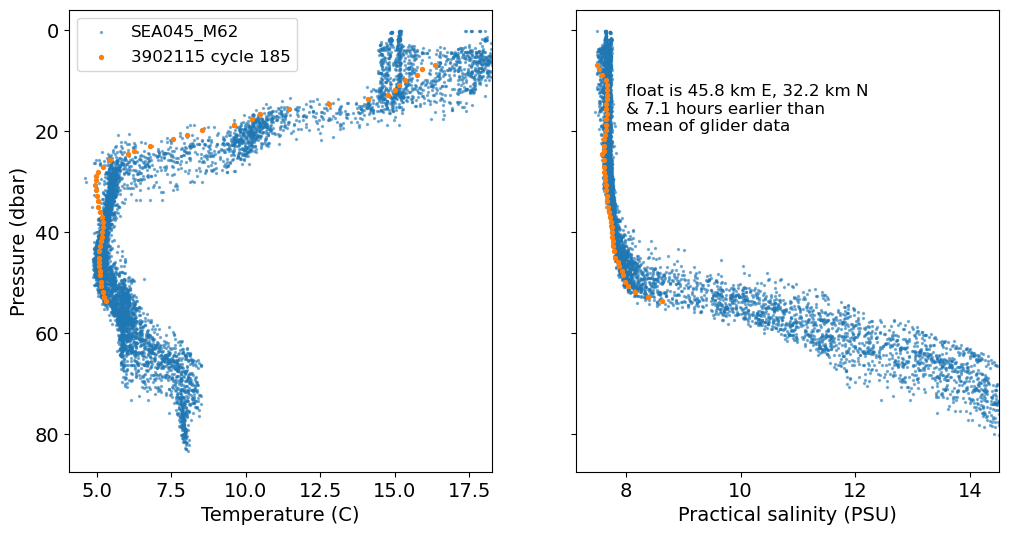

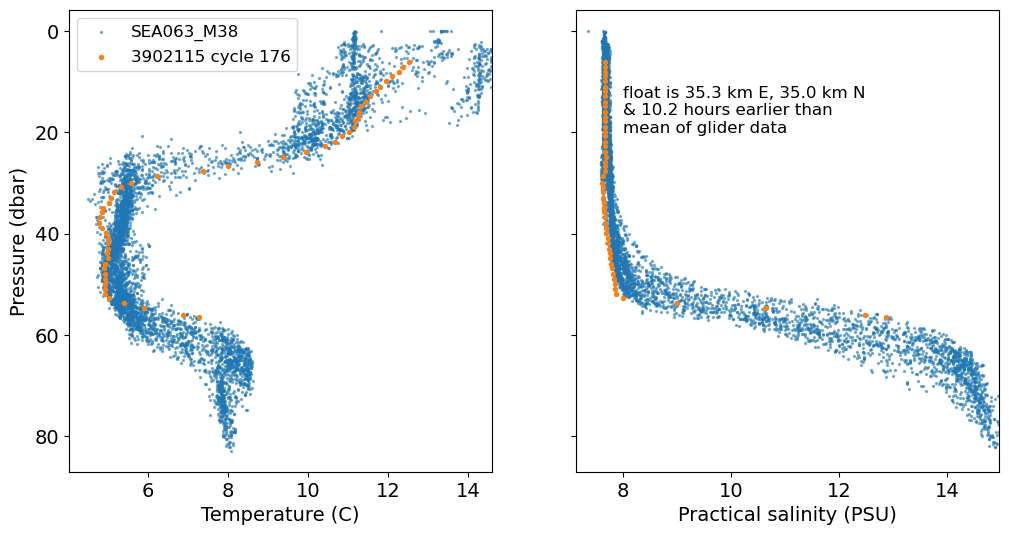

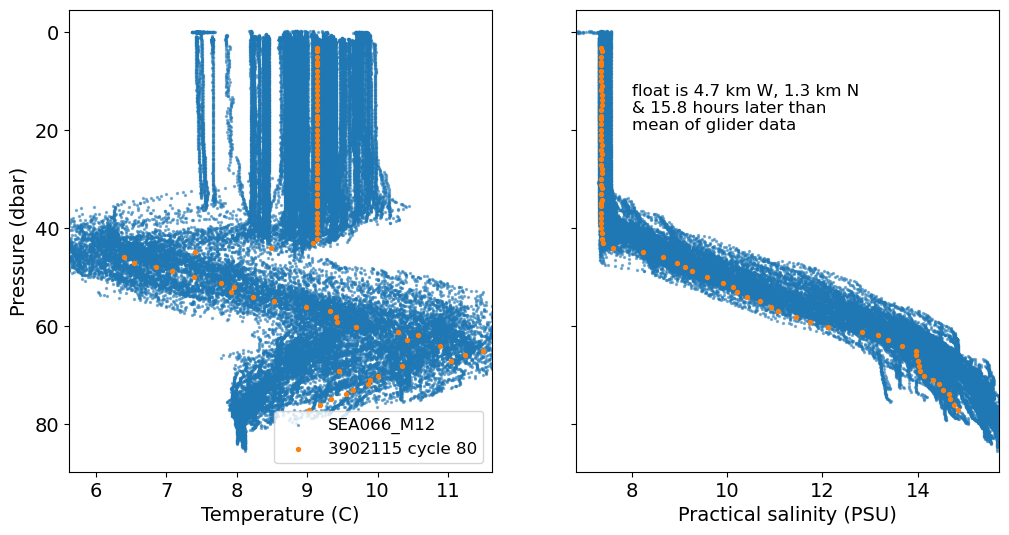

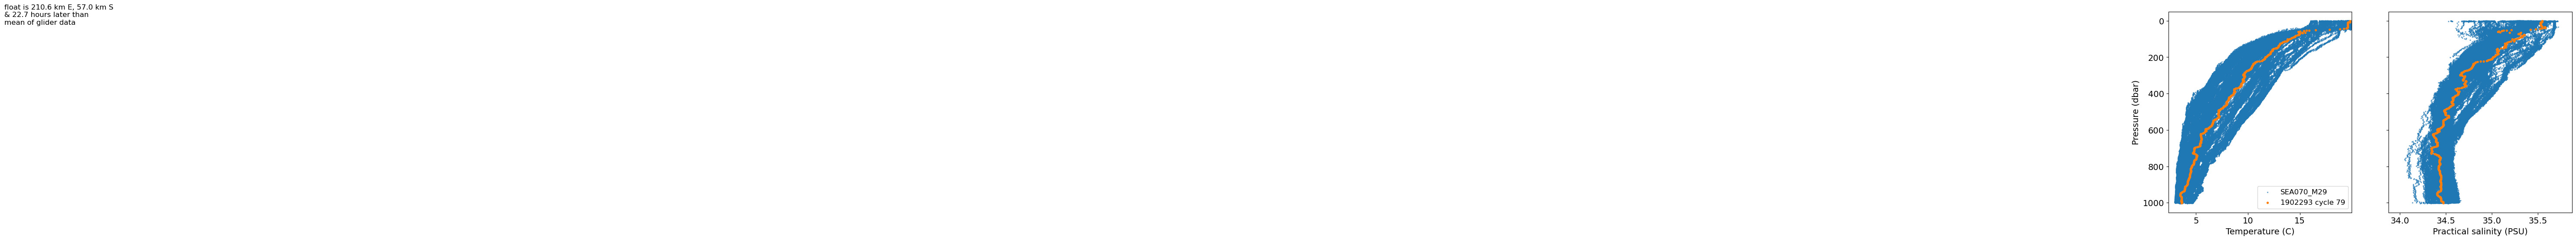

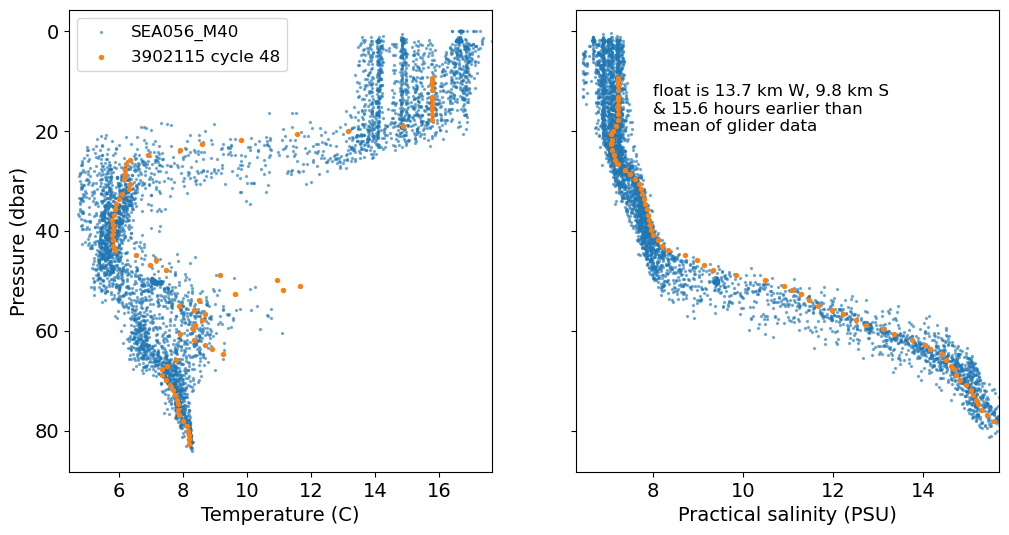

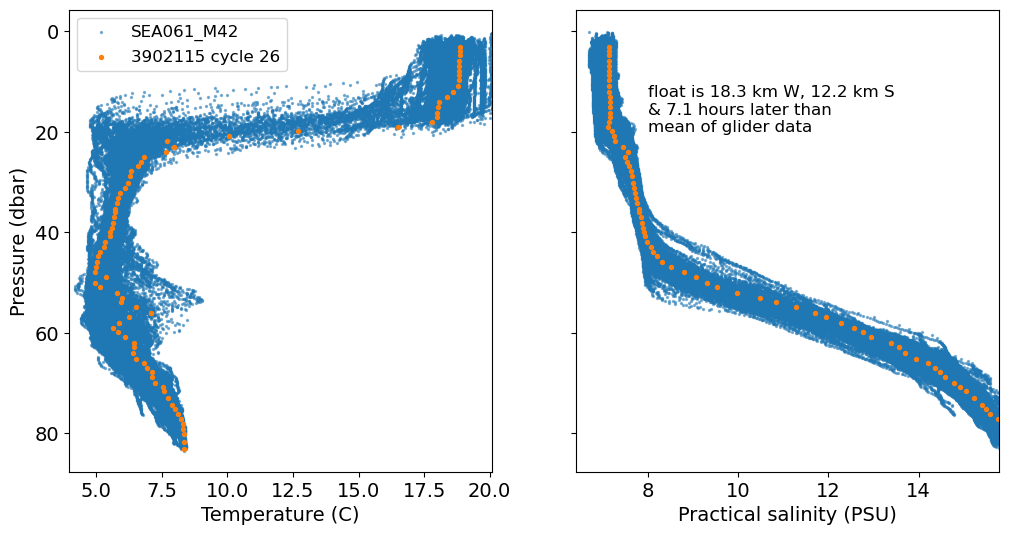

In [12]:
if not Path("figures").exists():
    Path("figures").mkdir()
def compare_scatter(name, ds_glider, ds_argo):
    """
    Create scatter plots of temperature and salinity to visually compare glider and argo float data
    """
    fig, ax = plt.subplots(1,2, sharey="row", figsize=(12, 6))
    ax = ax.ravel()
    argo_name = f"{int(ds_argo.PLATFORM_NUMBER)} cycle {int(ds_argo.CYCLE_NUMBER)}"
    temp_lim = [np.nanpercentile(ds_glider.temperature,5)-1, np.nanpercentile(ds_glider.temperature,95)+1]
    ax[0].scatter(ds_glider.temperature, ds_glider.pressure, s=2, label=name[4:], alpha=0.5)
    ax[0].scatter(ds_argo.TEMP, ds_argo.PRES, s=8, label=argo_name)
    ax[0].invert_yaxis()
    ax[0].set(ylabel="Pressure (dbar)", xlabel="Temperature (C)", xlim=temp_lim)
    sal_lim = [np.nanpercentile(ds_glider.salinity,5)-0.5, np.nanpercentile(ds_glider.salinity,95)+0.5]
    ax[1].scatter(ds_glider.salinity, ds_glider.pressure, s=2, alpha=0.5)
    ax[1].scatter(ds_argo.PSAL, ds_argo.PRES, s=8)
    ax[1].set(xlabel="Practical salinity (PSU)", xlim=sal_lim)
    ax[0].legend(fontsize=12)
    
    deg_n = ds_argo.LATITUDE.values - np.nanmean(ds_glider.latitude)
    deg_e = ds_argo.LONGITUDE.values - np.nanmean(ds_glider.longitude)
    ns_ahead = ds_argo.TIME.values - ds_glider.time.mean()
    east_diff, north_diff, time_diff = utils.format_difference(deg_e, deg_n, ns_ahead)
    loc_str = f"float is {east_diff}, {north_diff}\n& {time_diff} than \nmean of glider data"
    loc_str
    ax[1].text(8, 20, loc_str, fontsize=12)
    
    plt.savefig(f"figures/argo_{name}.png")
    #plt.close("all")

for name, ds_argo in argo_datasets.items():
    if ds_argo:
        compare_scatter(name, glider_datasets[name], ds_argo)

# Create map showing Argo float match locations

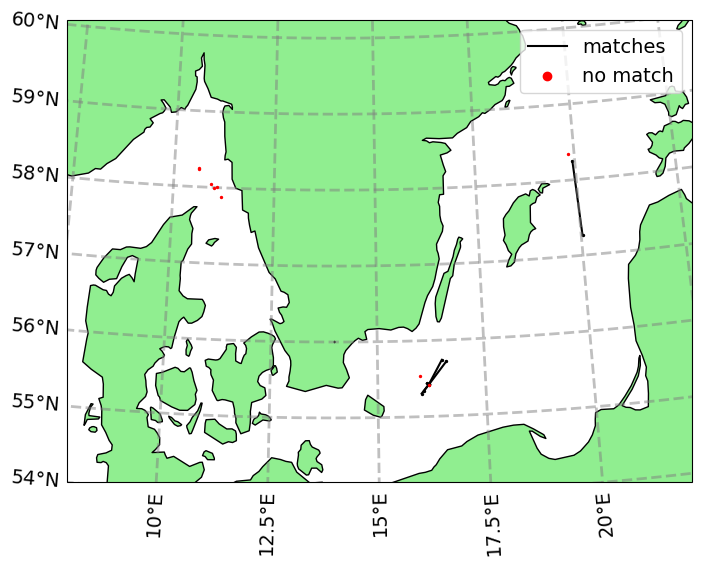

In [13]:
coord = cartopy.crs.AzimuthalEquidistant(central_longitude=14, central_latitude=56)
pc = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection=coord)
ax.set_extent([8, 22, 54, 60], crs=pc)

feature = cartopy.feature.NaturalEarthFeature(name='land', category='physical',
                                              scale='50m', edgecolor='black', facecolor='lightgreen')
ax.add_feature(feature)
gl = ax.gridlines(draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = None
gl.right_labels = None

for name, ds_argo in argo_datasets.items():
    ds_glider = glider_datasets[name]
    if ds_argo:
        lon = [ds_argo.LONGITUDE, np.nanmean(ds_glider.longitude)]
        lat = [ds_argo.LATITUDE, np.nanmean(ds_glider.latitude)]
        ax.scatter(lon, lat, transform=pc, s=2, color="k")
        ax.plot(lon, lat, transform=pc, color="k")
    else:
        ax.scatter(np.nanmean(ds_glider.longitude), np.nanmean(ds_glider.latitude),
                   transform=pc, s=2, color="red", zorder=5)

ax.plot((0,1), (0,1),color="k", label="matches")
ax.scatter((0,1), (0,1),color="red", label="no match")

ax.legend()
fig.savefig(f"figures/argo_map.png")


----------------------------

### References

argopy https://argopy.readthedocs.io/en/latest/

ifremer argo ERDDAP server https://erddap.ifremer.fr/erddap/index.html